In [65]:
# Load dataset
data_path <- '/kaggle/input/insights-into-sleep-patterns-and-daily-habits/sleep_health_lifestyle_dataset.csv'
dataset <- read.csv(data_path)

In [66]:
head(dataset, 5)

,Person.ID,Gender,Age,Occupation,Sleep.Duration..hours.,Quality.of.Sleep..scale..1.10.,Physical.Activity.Level..minutes.day.,Stress.Level..scale..1.10.,BMI.Category,Blood.Pressure..systolic.diastolic.,Heart.Rate..bpm.,Daily.Steps,Sleep.Disorder
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,None
2,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,None
3,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,None
4,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,None
5,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [67]:
summary(dataset)

   Person.ID        Gender               Age         Occupation       
 Min.   :  1.0   Length:400         Min.   :18.00   Length:400        
 1st Qu.:100.8   Class :character   1st Qu.:29.00   Class :character  
 Median :200.5   Mode  :character   Median :40.00   Mode  :character  
 Mean   :200.5                      Mean   :39.95                     
 3rd Qu.:300.2                      3rd Qu.:49.00                     
 Max.   :400.0                      Max.   :90.00                     
 Sleep.Duration..hours. Quality.of.Sleep..scale..1.10.
 Min.   : 4.100         Min.   : 1.000                
 1st Qu.: 5.900         1st Qu.: 4.700                
 Median : 8.200         Median : 6.100                
 Mean   : 8.041         Mean   : 6.126                
 3rd Qu.:10.125         3rd Qu.: 7.425                
 Max.   :12.000         Max.   :10.000                
 Physical.Activity.Level..minutes.day. Stress.Level..scale..1.10.
 Min.   : 10.00                        Min.   : 1.00

In [68]:
colSums(is.na(dataset))

Person.ID                                Gender 
                                    0                                     0 
                                  Age                            Occupation 
                                    0                                     0 
               Sleep.Duration..hours.        Quality.of.Sleep..scale..1.10. 
                                    0                                     0 
Physical.Activity.Level..minutes.day.            Stress.Level..scale..1.10. 
                                    0                                     0 
                         BMI.Category   Blood.Pressure..systolic.diastolic. 
                                    0                                     0 
                     Heart.Rate..bpm.                           Daily.Steps 
                                    0                                     0 
                       Sleep.Disorder 
                                    0

In [69]:
colnames(dataset)

[1] "Person.ID"                            
 [2] "Gender"                               
 [3] "Age"                                  
 [4] "Occupation"                           
 [5] "Sleep.Duration..hours."               
 [6] "Quality.of.Sleep..scale..1.10."       
 [7] "Physical.Activity.Level..minutes.day."
 [8] "Stress.Level..scale..1.10."           
 [9] "BMI.Category"                         
[10] "Blood.Pressure..systolic.diastolic."  
[11] "Heart.Rate..bpm."                     
[12] "Daily.Steps"                          
[13] "Sleep.Disorder"

In [70]:
install.packages("dplyr")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [71]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

In [72]:
packageVersion("dplyr")
packageVersion("ggplot2")

[1] ‘1.1.4’

[1] ‘3.5.1’

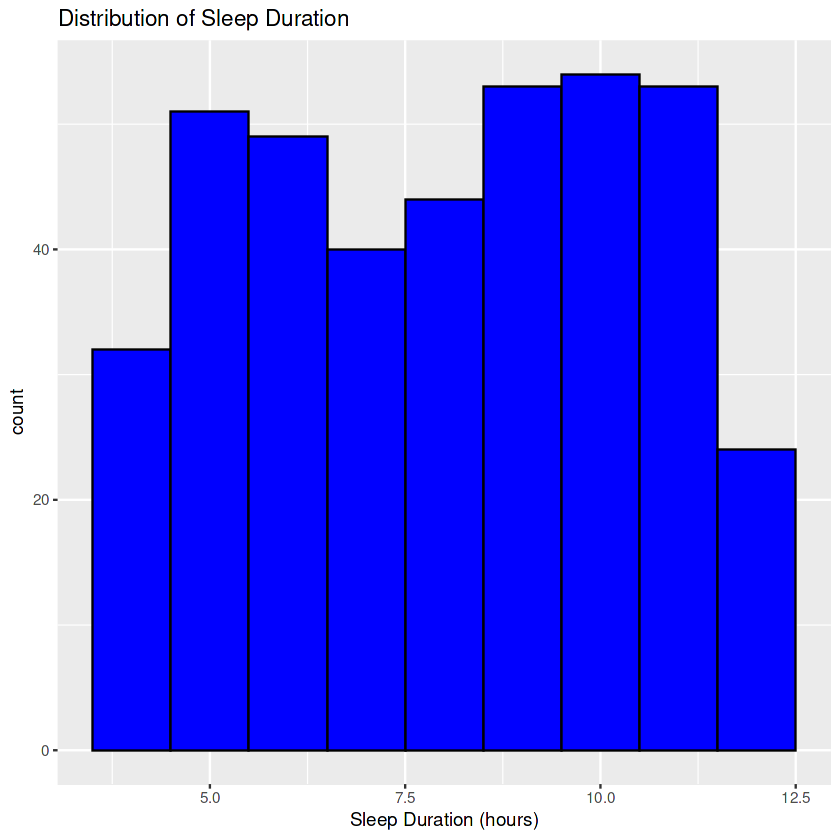

In [73]:
# Plot the distribution of sleep duration
ggplot(dataset, aes(x = Sleep.Duration..hours.)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Distribution of Sleep Duration", x = "Sleep Duration (hours)", y = "count")

In [74]:
class(dataset)

[1] "data.frame"

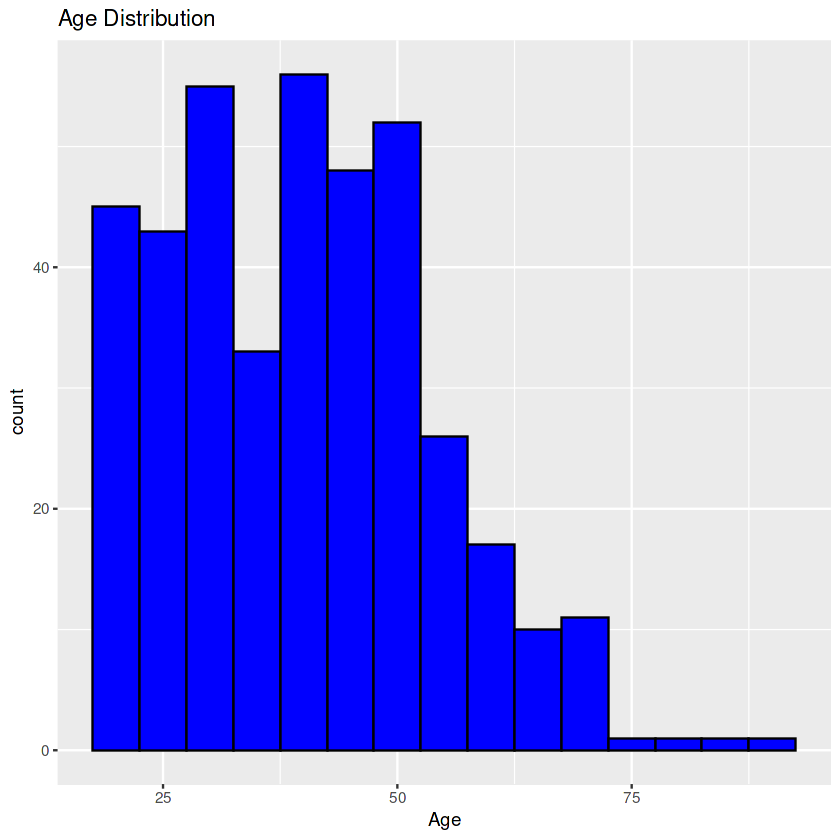

In [75]:
#the distribution of 'Age'
ggplot(dataset, aes(x = Age)) + 
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(title = "Age Distribution")

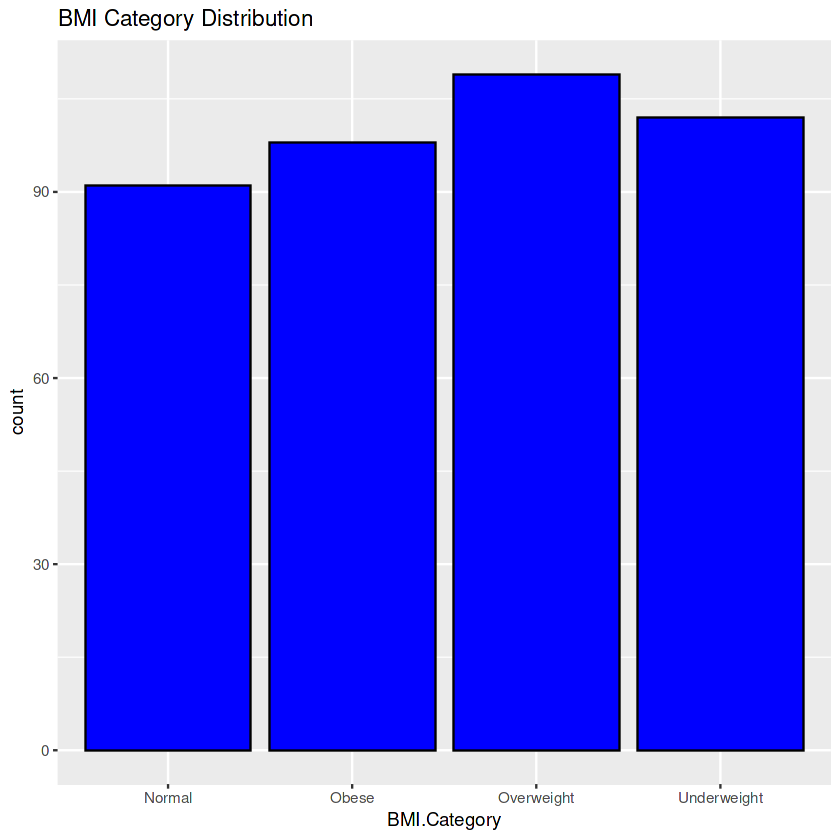

In [76]:
#the distribution of 'BMI Category'
ggplot(dataset, aes(x = BMI.Category)) + 
  geom_bar(fill = "blue", color = "black") +
  labs(title = "BMI Category Distribution")

In [77]:
#Check the correlation between variables (Age and Stress Level)
cor(dataset$Age, dataset$Stress.Level..scale..1.10.)

[1] 0.06066493

In [97]:
highest_stress_level <- max(dataset$Stress.Level..scale..1.10., na.rm = TRUE)


In [98]:
highest_stress_level

[1] 10

In [78]:
# Linear Regression Model
# trying to predict 'Heart Rate' using 'Age', 'Gender', and 'Stress Level'
model <- lm(Heart.Rate..bpm. ~ Age + Gender + Stress.Level..scale..1.10., data = dataset)

In [79]:
summary(model)


Call:
lm(formula = Heart.Rate..bpm. ~ Age + Gender + Stress.Level..scale..1.10., 
    data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.126 -12.574   0.656  13.824  25.986 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                73.705998   2.746497  26.836   <2e-16 ***
Age                         0.007765   0.053987   0.144    0.886    
GenderMale                 -0.459175   1.511293  -0.304    0.761    
Stress.Level..scale..1.10.  0.402415   0.269863   1.491    0.137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.11 on 396 degrees of freedom
Multiple R-squared:  0.005924,	Adjusted R-squared:  -0.001607 
F-statistic: 0.7866 on 3 and 396 DF,  p-value: 0.5019


`geom_smooth()` using formula = 'y ~ x'


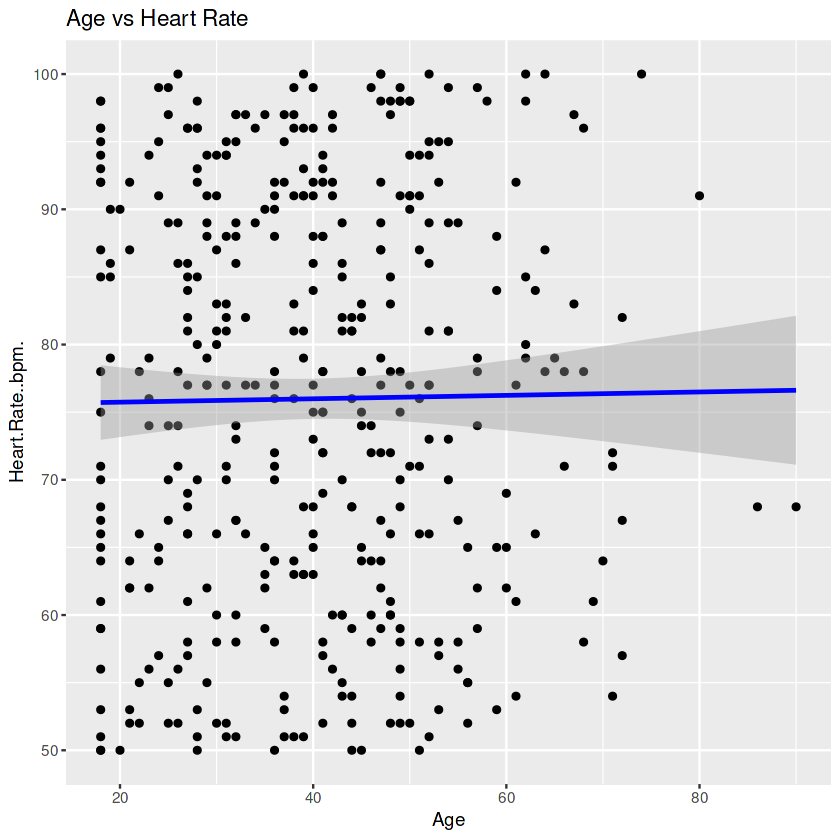

In [80]:
#Relationship between 'Age' and 'Heart Rate'
ggplot(dataset, aes(x = Age, y = Heart.Rate..bpm.)) + 
  geom_point() +  # Scatter plot for data points
  geom_smooth(method = "lm", color = "blue") +  # Add linear regression line
  labs(title = "Age vs Heart Rate")

In [81]:
# Use the model to make predictions on the data
predictions <- predict(model, dataset)

In [82]:
# Calculate RMSE
rmse <- sqrt(mean((predictions - dataset$Heart.Rate..bpm.)^2))

In [83]:
rmse

[1] 15.03572

In [92]:
str(dataset$Gender) 

# Convert to factor
if (!is.factor(dataset$Gender)) {
  dataset$Gender <- as.factor(dataset$Gender)
}

 Factor w/ 2 levels "Female","Male": 2 1 2 2 2 1 2 2 2 1 ...


In [93]:
# Check levels after conversion
gender_levels <- levels(dataset$Gender)
print(gender_levels)  

[1] "Female" "Male"  


# Prediction

In [101]:
new_data <- data.frame(
  Age = c(25, 35, 45), 
  Gender = c('Male', 'Female', 'Male'),  
  Stress.Level..scale..1.10. = c(4, 6, 7)  
)

new_data$Gender <- factor(new_data$Gender, levels = gender_levels)

str(new_data)

# Make predictions using the model
if (exists("model")) {
  prediction <- predict(model, new_data)
  
  print(prediction)

} else {
  print("Model not found. Please ensure the model is defined and trained.")
}


'data.frame':	3 obs. of  3 variables:
 $ Age                       : num  25 35 45
 $ Gender                    : Factor w/ 2 levels "Female","Male": 2 1 2
 $ Stress.Level..scale..1.10.: num  4 6 7
       1        2        3 
75.05062 76.39227 76.41317 


In [108]:
set.seed(42) 


gender_levels <- c("Male", "Female")

#random data for 400 rows
new_data <- data.frame(
  Age = sample(18:65, 400, replace = TRUE), 
  Gender = sample(gender_levels, 400, replace = TRUE),  
  Stress.Level..scale..1.10. = sample(1:10, 400, replace = TRUE)  
)

# Convert Gender to factor with defined levels
new_data$Gender <- factor(new_data$Gender, levels = gender_levels)

# Check the structure of the new data
str(new_data)

if (exists("model")) {
  prediction_new <- predict(model, new_data)
  
  print(prediction_new)
} else {
  print("Model not found. Please ensure the model is defined and trained.")
}


'data.frame':	400 obs. of  3 variables:
 $ Age                       : int  54 18 42 27 53 35 64 41 24 53 ...
 $ Gender                    : Factor w/ 2 levels "Male","Female": 1 2 1 1 2 1 1 2 2 1 ...
 $ Stress.Level..scale..1.10.: int  9 1 6 4 9 8 6 6 1 9 ...
       1        2        3        4        5        6        7        8 
77.28789 74.24819 75.98746 75.06615 77.73930 76.73793 76.15830 76.43887 
       9       10       11       12       13       14       15       16 
74.29478 77.28012 74.37780 74.87340 74.59763 74.39573 73.98315 77.42230 
      17       18       19       20       21       22       23       24 
74.20696 74.55880 76.38987 76.00299 74.92239 75.67823 74.48115 77.80918 
      25       26       27       28       29       30       31       32 
76.23456 74.33897 75.71169 76.41317 78.17277 75.06855 76.91117 76.17623 
      33       34       35       36       37       38       39       40 
77.24370 76.02628 75.72482 75.50739 74.81368 77.06269 74.86563 75.07632 
      41 

In [109]:

length(prediction_new)
length(dataset$Heart.Rate..bpm.) 

[1] 400

[1] 400

In [118]:
# prediction_new and dataset$Heart.Rate..bpm. are numeric
prediction_new <- as.numeric(prediction_new) 
actual_values <- as.numeric(dataset$Heart.Rate..bpm.)  
# Calculate RMSE
rmse_for_new <- sqrt(mean((prediction_new - actual_values)^2))


In [119]:
rmse_for_new

[1] 15.05201